# **Renaldi Panji Wibowo**

## **[Discovering Hidden Trends in Global Video Games](https://www.kaggle.com/datasets/thedevastator/discovering-hidden-trends-in-global-video-games/code)**



In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from functools import reduce
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Video Games Sales.csv')

In [4]:
df

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


## **Membersihkan Data**

### **Memilih Fitur**

In [6]:
df.rename(columns = {'index':'User_ID', 'Game Title':'Game_Title'}, inplace = True)
selected_df = df[['User_ID', 'Game_Title',	'Platform',	'Year',	'Genre',	'Publisher', 'Review']]

clean_df = selected_df.dropna()

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1906
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     1878 non-null   int64  
 1   Game_Title  1878 non-null   object 
 2   Platform    1878 non-null   object 
 3   Year        1878 non-null   float64
 4   Genre       1878 non-null   object 
 5   Publisher   1878 non-null   object 
 6   Review      1878 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 117.4+ KB


In [8]:
clean_df.head()

,User_ID,Game_Title,Platform,Year,Genre,Publisher,Review
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,76.28
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,91.00
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.07
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,82.65
4,4,Tetris,GB,1989.0,Puzzle,Nintendo,88.00


### **Format Ulang Fitur**

In [9]:
print('Jumlah User ID: ', len(clean_df.User_ID.unique()))
print('Jumlah Nama Game: ', len(clean_df.Game_Title.unique()))
print('Jumlah Genre: ', len(clean_df.Genre.unique()))

Jumlah User ID:  1878
Jumlah Nama Game:  1505
Jumlah Genre:  12


In [10]:
clean_df['Review'] = round(clean_df['Review'])
clean_df

<ipython-input-10-bb2901dfaf58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Review'] = round(clean_df['Review'])


,User_ID,Game_Title,Platform,Year,Genre,Publisher,Review
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,76.0
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,91.0
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.0
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,83.0
4,4,Tetris,GB,1989.0,Puzzle,Nintendo,88.0
...,...,...,...,...,...,...,...
1902,1902,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,55.0
1903,1903,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,92.0
1904,1904,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,73.0
1905,1905,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,73.0


In [11]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1906
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     1878 non-null   int64  
 1   Game_Title  1878 non-null   object 
 2   Platform    1878 non-null   object 
 3   Year        1878 non-null   float64
 4   Genre       1878 non-null   object 
 5   Publisher   1878 non-null   object 
 6   Review      1878 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 117.4+ KB


### **Membuat Game ID Produk**

In [12]:
LE = LabelEncoder()

clean_df['Game_ID'] = LE.fit_transform(clean_df['Game_Title'])

<ipython-input-12-f93033125f90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Game_ID'] = LE.fit_transform(clean_df['Game_Title'])


In [13]:
clean_df

,User_ID,Game_Title,Platform,Year,Genre,Publisher,Review,Game_ID
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,76.0,1444
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,91.0,1182
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.0,623
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,83.0,1445
4,4,Tetris,GB,1989.0,Puzzle,Nintendo,88.0,1243
...,...,...,...,...,...,...,...,...
1902,1902,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,55.0,567
1903,1903,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,92.0,1471
1904,1904,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,73.0,1056
1905,1905,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,73.0,308


In [14]:
for col in clean_df:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(clean_df[col].value_counts(), '\n')

User_ID 
--------------------
0       1
1262    1
1274    1
1273    1
1272    1
       ..
630     1
629     1
628     1
627     1
1906    1
Name: User_ID, Length: 1878, dtype: int64 

Game_Title 
--------------------
FIFA Soccer 08                                 6
WWE SmackDown vs Raw 2008                      5
The Simpsons Game                              5
Pro Evolution Soccer 2008                      5
LEGO Indiana Jones: The Original Adventures    5
                                              ..
Star Wars: Dark Forces                         1
The 7th Guest                                  1
Crash Nitro Kart                               1
Scribblenauts                                  1
FIFA Soccer World Championship                 1
Name: Game_Title, Length: 1505, dtype: int64 

Platform 
--------------------
PS2     363
PS      221
X360    218
PS3     200
Wii     156
DS      149
GBA      73
XB       70
PC       69
PSP      61
NES      60
N64      57
GC       55
GB       4

### **Menghapus Data Duplikat**

In [15]:
clean_df = clean_df.drop_duplicates('Game_ID')
clean_df = clean_df.reset_index(drop=True)
clean_df

,User_ID,Game_Title,Platform,Year,Genre,Publisher,Review,Game_ID
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,76.0,1444
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,91.0,1182
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.0,623
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,83.0,1445
4,4,Tetris,GB,1989.0,Puzzle,Nintendo,88.0,1243
...,...,...,...,...,...,...,...,...
1500,1898,Dynasty Warriors 2,PS2,2000.0,Action,THQ,72.0,264
1501,1900,Army of Two: The 40th Day,X360,2010.0,Shooter,Electronic Arts,72.0,40
1502,1902,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,55.0,567
1503,1903,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,92.0,1471


### **Visualisasi Data**

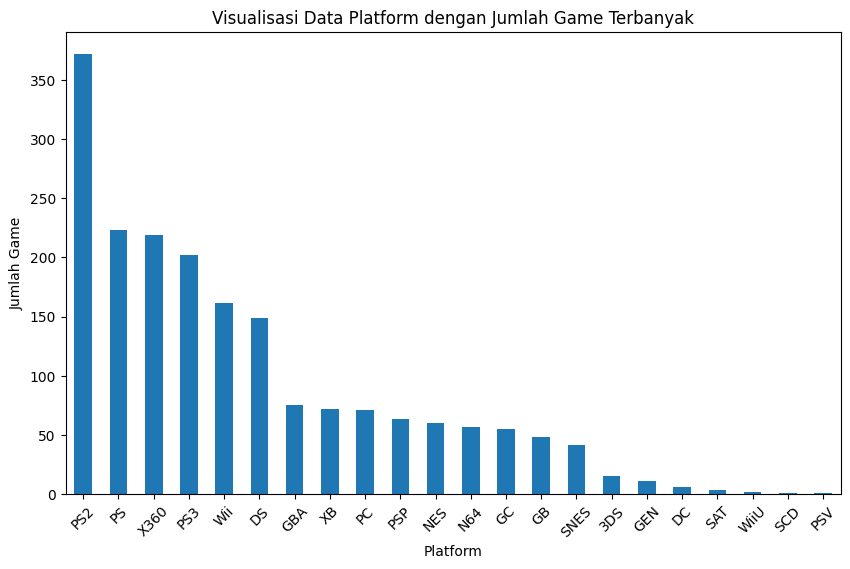

In [22]:
# Menghitung jumlah game untuk setiap platform
platform_counts = df['Platform'].value_counts()

# Membuat plot bar untuk 10 platform terbesar
plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar')
plt.title('Visualisasi Data Platform dengan Jumlah Game Terbanyak')
plt.xlabel('Platform')
plt.ylabel('Jumlah Game')
plt.xticks(rotation=45)
plt.show()

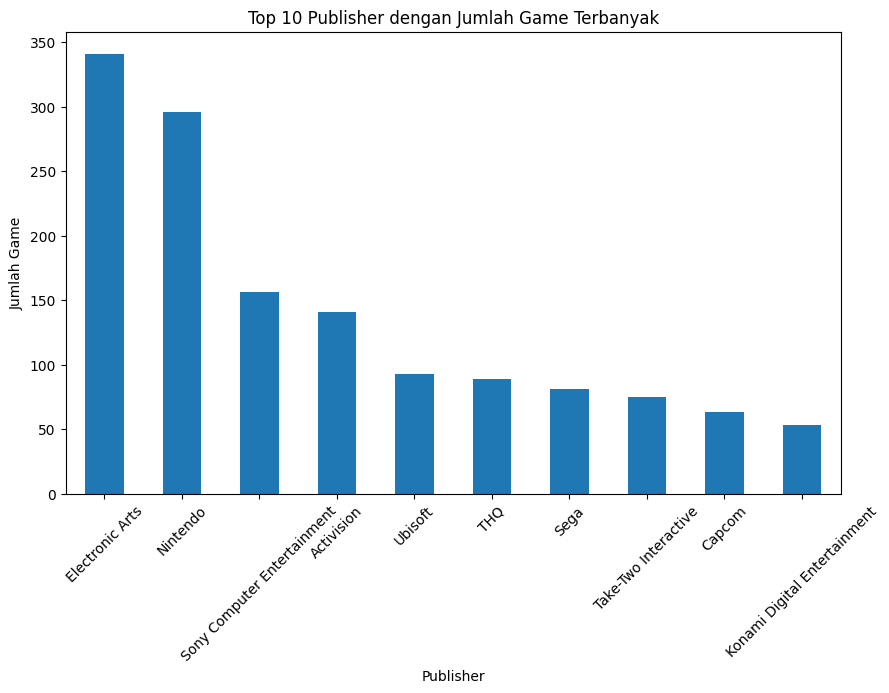

In [19]:
# Menghitung jumlah game untuk setiap publisher
publisher_counts = df['Publisher'].value_counts().head(10)

# Membuat plot bar untuk 10 publisher terbesar
plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='bar')
plt.title('Top 10 Publisher dengan Jumlah Game Terbanyak')
plt.xlabel('Publisher')
plt.ylabel('Jumlah Game')
plt.xticks(rotation=45)
plt.show()

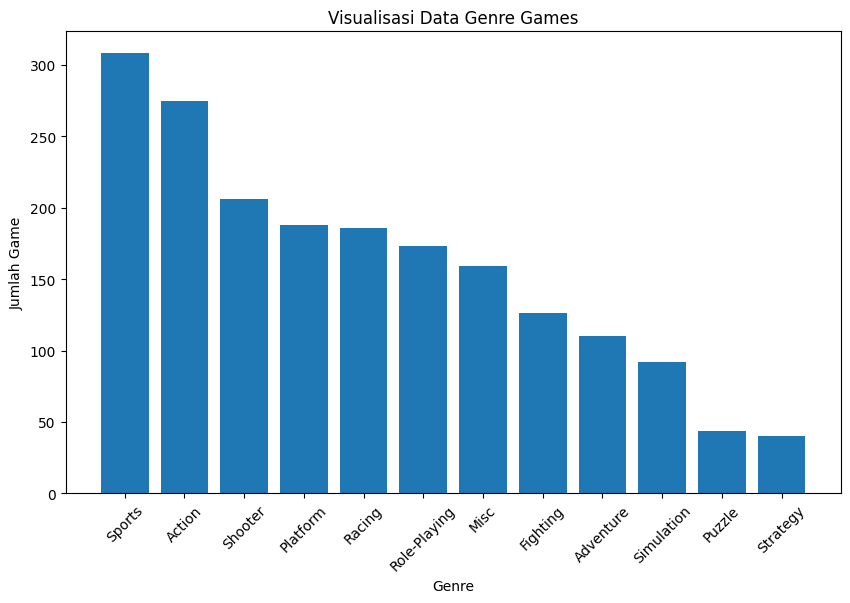

In [26]:
# Ambil 10 genre dengan jumlah terbanyak
top_genres = df['Genre'].value_counts()

# Buat plot bar
plt.figure(figsize=(10, 6))
plt.bar(top_genres.index, top_genres.values)
plt.xlabel('Genre')
plt.ylabel('Jumlah Game')
plt.title('Visualisasi Data Genre Games')
plt.xticks(rotation=45)
plt.show()

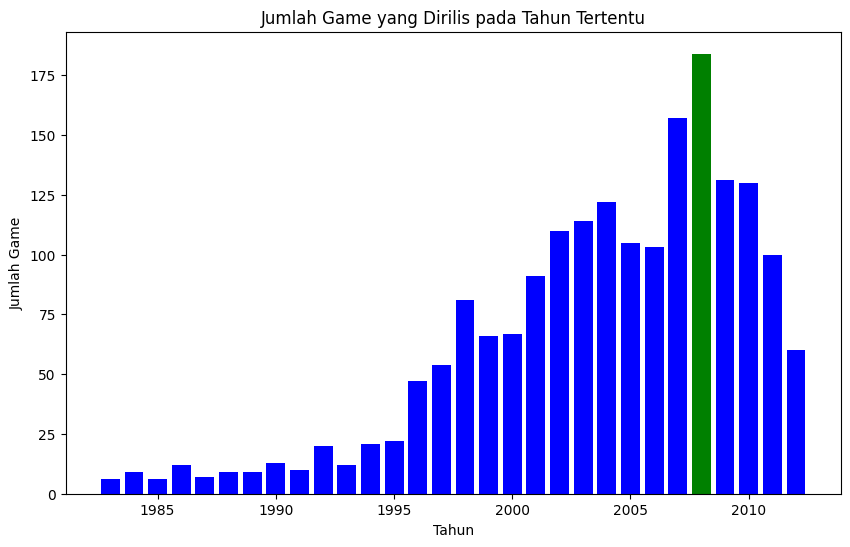

In [33]:
# Hitung jumlah game yang dirilis pada setiap tahun
game_count_by_year = df['Year'].value_counts().sort_index()

# Plot visualisasi
plt.figure(figsize=(10, 6))

# Plot seluruh bar
plt.bar(game_count_by_year.index, game_count_by_year.values, color='blue')

# Temukan nilai tertinggi pada tahun 2008
max_count = game_count_by_year[2008]
max_index = game_count_by_year.index[game_count_by_year.index == 2008].values[0]

# Plot bar khusus untuk tahun 2008 dengan warna merah
plt.bar(max_index, max_count, color='green')

plt.xlabel('Tahun')
plt.ylabel('Jumlah Game')
plt.title('Jumlah Game yang Dirilis pada Tahun Tertentu')

plt.show()

## **Model Development dengan Content Based Filtering**

In [36]:
game_id = clean_df['Game_ID'].tolist()

genre = clean_df['Genre'].tolist()

title = clean_df['Game_Title'].tolist()

print('Total Game Id = ',len(game_id))
print('Total Genre = ',len(genre))
print('Total Game Tittle = ',len(title))

Total Game Id =  1505
Total Genre =  1505
Total Game Tittle =  1505


In [37]:
product_new = pd.DataFrame({
    'game_id': game_id,
    'genre': genre,
    'title': title
})
product_new

,game_id,genre,title
0,1444,Sports,Wii Sports
1,1182,Platform,Super Mario Bros.
2,623,Racing,Mario Kart Wii
3,1445,Sports,Wii Sports Resort
4,1243,Puzzle,Tetris
...,...,...,...
1500,264,Action,Dynasty Warriors 2
1501,40,Shooter,Army of Two: The 40th Day
1502,567,Action,Lizzie McGuire 2: Lizzie Diaries
1503,1471,Role-Playing,Xenoblade Chronicles


In [38]:
first_df = product_new
first_df.sample(5)

,game_id,genre,title
51,391,Racing,Gran Turismo 2
976,669,Role-Playing,Mega Man Battle Network 3 Blue / White Version
184,1100,Platform,Sonic the Hedgehog
1001,357,Racing,Forza: Horizon
746,1331,Shooter,Tom Clancy's Rainbow Six


### **TF-IDF Vectorizer**

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(first_df['genre'])
feature_names = tf.get_feature_names_out()

print("Daftar fitur (kata):", feature_names)

Daftar fitur (kata): ['action' 'adventure' 'fighting' 'misc' 'platform' 'playing' 'puzzle'
 'racing' 'role' 'shooter' 'simulation' 'sports' 'strategy']


In [42]:
tfidf_matrix = tf.fit_transform(first_df['genre'])

tfidf_matrix.shape

(1505, 13)

In [43]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

In [45]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=first_df['title']
).sample(10, axis=1).sample(10, axis=0)

,shooter,puzzle,adventure,misc,role,strategy,sports,platform,playing,simulation
title,,,,,,,,,,
Halo 4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wario Land II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Metal Gear Solid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kinect: Disneyland Adventures,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
BioShock,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Street Fighter Alpha 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Street Fighter II: The World Warrior,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dora the Explorer: Dora Saves the Mermaids,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Street Fighter IV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Cosine Similarity**

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [47]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=first_df['title'], columns=first_df['title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (1505, 1505)


title,Tetris Plus,Tennis,Brain Age 2: More Training in Minutes a Day,Halo Wars,Super Mario Advance 4: Super Mario Bros. 3,Commando,Imagine: Animal Doctor,LEGO Star Wars: The Complete Saga,Burnout 2: Point of Impact,Kirby & the Amazing Mirror
title,,,,,,,,,,
Final Fantasy VII,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Forza Motorsport 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Pokémon Heart Gold / Soul Silver Version,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Devil May Cry 3: Dante's Awakening,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
Viva Pinata,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Monster Hunter Tri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Super Monkey Ball: Banana Blitz,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SimCity 2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Diddy Kong Racing DS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## **Mendapatkan Rekomendasi**

In [48]:
def game_recommendations(nama_game, similarity_data=cosine_sim_df, items=first_df[['title', 'genre']], k=5):
    index = similarity_data.loc[:,nama_game].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(nama_game, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [49]:
first_df[first_df.title.eq('Super Mario Bros.')]

,game_id,genre,title
1,1182,Platform,Super Mario Bros.


In [50]:
game_recommendations('Super Mario Bros.')

,title,genre
0,Super Mario Bros. 2 (FDS),Platform
1,Donkey Kong Country 2: Diddy's Kong Quest,Platform
2,Sonic Adventure DX: Director's Cut,Platform
3,LittleBigPlanet,Platform
4,Super Mario Advance 4: Super Mario Bros. 3,Platform


## **Model Development dengan Collaborative Filtering**

In [51]:
user_id = clean_df['User_ID'].tolist()

game_id = clean_df['Game_ID'].tolist()

title = clean_df['Game_Title'].tolist()

platform = clean_df['Platform'].tolist()

year = clean_df['Year'].tolist()

genre = clean_df['Genre'].tolist()

publisher = clean_df['Publisher'].tolist()

rating = clean_df['Review'].tolist()

print(len(user_id))
print(len(game_id))
print(len(rating))

1505
1505
1505


In [52]:
rating_new = pd.DataFrame({
    'user_id': user_id,
    'game_id' : game_id,
    'title' : title,
    'platform' : platform,
    'year' : year,
    'genre' : genre,
    'publisher' : publisher,
    'rating': rating
})
rating_new

,user_id,game_id,title,platform,year,genre,publisher,rating
0,0,1444,Wii Sports,Wii,2006.0,Sports,Nintendo,76.0
1,1,1182,Super Mario Bros.,NES,1985.0,Platform,Nintendo,91.0
2,2,623,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,82.0
3,3,1445,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,83.0
4,4,1243,Tetris,GB,1989.0,Puzzle,Nintendo,88.0
...,...,...,...,...,...,...,...,...
1500,1898,264,Dynasty Warriors 2,PS2,2000.0,Action,THQ,72.0
1501,1900,40,Army of Two: The 40th Day,X360,2010.0,Shooter,Electronic Arts,72.0
1502,1902,567,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,55.0
1503,1903,1471,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,92.0


In [53]:
second_df = rating_new
second_df.sample(5)

,user_id,game_id,title,platform,year,genre,publisher,rating
859,1005,953,Rage,X360,2011.0,Shooter,Bethesda Softworks,81.0
229,254,348,Flash Focus: Vision Training in Minutes a Day,DS,2007.0,Misc,Nintendo,61.0
1015,1217,200,Disney Princess: Enchanted Journey,Wii,2007.0,Adventure,Disney Interactive Studios,64.0
691,801,388,GoldenEye 007 (2010),Wii,2010.0,Action,Activision,84.0
766,892,249,Dragon Quest VI: Realms of Revelation,DS,2010.0,Role-Playing,Nintendo,83.0


## **Mempersiapkan Data**

In [54]:
user_ids = second_df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 190, 191, 192, 194, 196, 197, 198, 199, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,

In [55]:
game_ids = second_df['game_id'].unique().tolist()

game_to_game_encoded = {x: i for i, x in enumerate(game_ids)}

game_encoded_to_game = {i: x for i, x in enumerate(game_ids)}

In [56]:
second_df['user'] = second_df['user_id'].map(user_to_user_encoded)

second_df['game'] = second_df['game_id'].map(game_to_game_encoded)

In [57]:
num_users = len(user_to_user_encoded)
print(num_users)

num_game = len(game_to_game_encoded)
print(num_game)

min_rating = min(second_df['rating'])

max_rating = max(second_df['rating'])

print('Number of User: {}, Number of Game: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_game, min_rating, max_rating
))

1505
1505
Number of User: 1505, Number of Game: 1505, Min Rating: 30.0, Max Rating: 97.0


## **Membagi Data untuk Training dan Validasi**

In [58]:
second_df = second_df.sample(frac=1, random_state=42)
second_df

,user_id,game_id,title,platform,year,genre,publisher,rating,user,game
51,56,391,Gran Turismo 2,PS,1999.0,Racing,Sony Computer Entertainment,92.0,51,51
976,1163,669,Mega Man Battle Network 3 Blue / White Version,GBA,2002.0,Role-Playing,Capcom,78.0,976,976
184,205,1100,Sonic the Hedgehog,GEN,1991.0,Platform,Sega,87.0,184,184
1001,1196,357,Forza: Horizon,X360,2012.0,Racing,Microsoft Game Studios,86.0,1001,1001
746,871,1331,Tom Clancy's Rainbow Six,PS,1999.0,Shooter,Red Storm Entertainment,48.0,746,746
...,...,...,...,...,...,...,...,...,...,...
1130,1370,48,Asteroids,PS,1998.0,Shooter,Success,65.0,1130,1130
1294,1597,364,Game & Watch Gallery,GB,1997.0,Misc,Nintendo,76.0,1294,1294
860,1006,411,Guitar Hero 5,Wii,2009.0,Misc,Activision,84.0,860,860
1459,1838,274,EA Sports Grand Slam Tennis,Wii,2009.0,Sports,Electronic Arts,79.0,1459,1459


In [59]:
x = second_df[['user','game']].values

y = second_df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * second_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  51   51]
 [ 976  976]
 [ 184  184]
 ...
 [ 860  860]
 [1459 1459]
 [1126 1126]] [0.92537313 0.71641791 0.85074627 ... 0.80597015 0.73134328 0.76119403]


## **Proses Training**

In [60]:
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In [61]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_game, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_game = num_game
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.game_embedding = layers.Embedding(
        num_game,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.game_bias = layers.Embedding(num_game, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    game_vector = self.game_embedding(inputs[:, 1])
    game_bias = self.game_bias(inputs[:, 1])

    dot_user_game = tf.tensordot(user_vector, game_vector, 2)

    x = dot_user_game + user_bias + game_bias

    return tf.nn.sigmoid(x)

In [62]:
model = RecommenderNet(num_users, num_game, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [63]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
151/151 [==============================] - 3s 7ms/step - loss: 0.6937 - root_mean_squared_error: 0.2835 - val_loss: 0.6931 - val_root_mean_squared_error: 0.2790
Epoch 2/100
151/151 [==============================] - 1s 4ms/step - loss: 0.6571 - root_mean_squared_error: 0.2492 - val_loss: 0.6930 - val_root_mean_squared_error: 0.2789
Epoch 3/100
151/151 [==============================] - 1s 5ms/step - loss: 0.6184 - root_mean_squared_error: 0.2078 - val_loss: 0.6931 - val_root_mean_squared_error: 0.2789
Epoch 4/100
151/151 [==============================] - 1s 5ms/step - loss: 0.5883 - root_mean_squared_error: 0.1709 - val_loss: 0.6932 - val_root_mean_squared_error: 0.2789
Epoch 5/100
151/151 [==============================] - 1s 5ms/step - loss: 0.5752 - root_mean_squared_error: 0.1540 - val_loss: 0.6932 - val_root_mean_squared_error: 0.2789
Epoch 6/100
151/151 [==============================] - 1s 4ms/step - loss: 0.5724 - root_mean_squared_error: 0.1506 - val_loss: 0.6932 

## **Visualisasi Metrik**

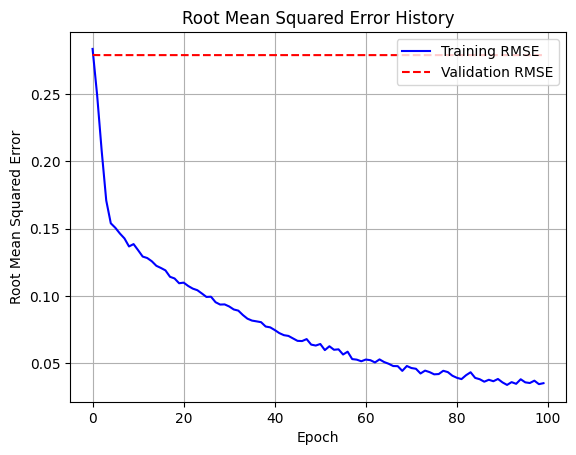

In [64]:
# Simpan nilai loss dari training dan validation ke dalam variabel tersendiri
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

# Buat plot dengan warna dan gaya garis yang berbeda untuk training dan validation
plt.plot(train_rmse, color='b', label='Training RMSE')
plt.plot(val_rmse, color='r', linestyle='dashed', label='Validation RMSE')

# Tambahkan judul, label sumbu, dan legenda
plt.title('Root Mean Squared Error History')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend(loc='upper right')

# Menambahkan grid untuk memudahkan pembacaan
plt.grid()

# Tampilkan plot
plt.show()

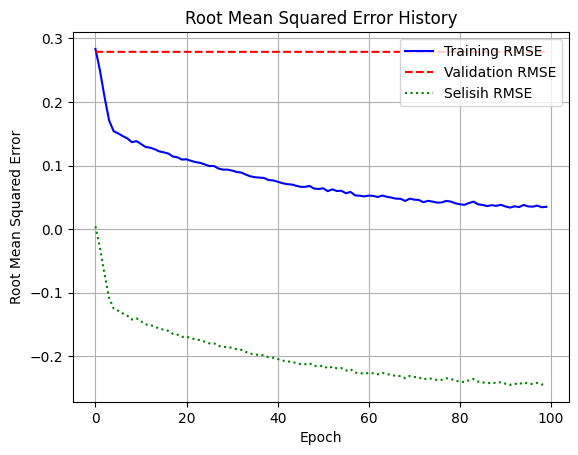

In [68]:
# Menyimpan nilai loss dari training dan validation ke dalam variabel tersendiri
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

# Menghitung selisih antara nilai training RMSE dan validation RMSE
selisih_rmse = [train_rmse[i] - val_rmse[i] for i in range(len(train_rmse))]

# Buat plot dengan warna dan gaya garis yang berbeda untuk training, validation, dan selisih
plt.plot(train_rmse, color='b', label='Training RMSE')
plt.plot(val_rmse, color='r', linestyle='dashed', label='Validation RMSE')
plt.plot(selisih_rmse, color='g', linestyle='dotted', label='Selisih RMSE')

# Tambahkan judul, label sumbu, dan legenda
plt.title('Root Mean Squared Error History')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend(loc='upper right')

# Menambahkan grid untuk memudahkan pembacaan
plt.grid()

# Tampilkan plot
plt.show()

In [70]:
# Menyimpan nilai loss dari training dan validation ke dalam variabel tersendiri
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

# Menentukan epoch yang ingin dicek selisihnya
epoch_to_check = 100

# Mendapatkan nilai training RMSE dan validation RMSE pada epoch tertentu
train_rmse_epoch = train_rmse[epoch_to_check - 1]
val_rmse_epoch = val_rmse[epoch_to_check - 1]

# Menghitung selisih antara nilai training RMSE dan validation RMSE pada epoch tertentu
selisih_rmse_epoch = train_rmse_epoch - val_rmse_epoch

# Menampilkan nilai selisih
print("Nilai selisih pada epoch ke-", epoch_to_check, "adalah:", selisih_rmse_epoch)

Nilai selisih pada epoch ke- 100 adalah: -0.24373484030365944


In [71]:
# Menyimpan nilai loss dari training dan validation ke dalam variabel tersendiri
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Menyimpan nilai root_mean_squared_error dari training dan validation ke dalam variabel tersendiri
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

In [72]:
# Cetak nilai loss dari training
print("Training Loss:", train_loss)

# Cetak nilai root_mean_squared_error dari training
print("Training RMSE:", train_rmse)

# Cetak nilai loss dari validation
print("Validation Loss:", val_loss)

# Cetak nilai root_mean_squared_error dari validation
print("Validation RMSE:", val_rmse)

Training Loss: [0.6937012672424316, 0.6570670008659363, 0.6184142827987671, 0.5883036255836487, 0.5751566886901855, 0.5723503232002258, 0.5692996978759766, 0.5666677355766296, 0.5625030994415283, 0.5637168288230896, 0.560847818851471, 0.5577196478843689, 0.5571341514587402, 0.5556212663650513, 0.5534102916717529, 0.5526326298713684, 0.5515692234039307, 0.5488940477371216, 0.548146665096283, 0.5464434623718262, 0.5462325215339661, 0.5452877879142761, 0.5440571308135986, 0.5434889197349548, 0.5422626733779907, 0.5410059690475464, 0.5410927534103394, 0.5391703844070435, 0.5384547114372253, 0.5383570194244385, 0.5377730131149292, 0.5367956161499023, 0.5362292528152466, 0.534898042678833, 0.5335988998413086, 0.5332094430923462, 0.5329436659812927, 0.5327188968658447, 0.5314098596572876, 0.5311448574066162, 0.5302129983901978, 0.5297070145606995, 0.5291038751602173, 0.528968870639801, 0.5282704830169678, 0.5275930762290955, 0.5274775624275208, 0.5278450846672058, 0.52663254737854, 0.52645188

## **Mendapatkan Rekomendasi Game**

In [65]:
game_df = product_new
rating_df = rating_new

user_id = rating_df['user_id'].sample(1).iloc[0]
game_played_by_user = rating_df[rating_df['user_id'] == user_id]

game_not_played = game_df[~game_df['game_id'].isin(game_played_by_user['game_id'].values)]['game_id']
game_not_played = list(
    set(game_not_played)
    .intersection(set(game_to_game_encoded.keys()))
)

game_not_played = [[game_to_game_encoded.get(x)] for x in game_not_played]
user_encoder = user_to_user_encoded.get(user_id)
user_game_array = np.hstack(
    ([[user_encoder]] * len(game_not_played), game_not_played)
)

In [66]:
ratings = model.predict(user_game_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_game_ids = [
    game_encoded_to_game.get(game_not_played[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('========' * 8)
print('Game with high ratings from user')
print('--------' * 8)

top_game_user = (
    game_played_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .game_id.values
)

game_df_rows = game_df[game_df['game_id'].isin(top_game_user)]
for row in game_df_rows.itertuples():
    print(row.title, ':', row.genre)

print('--------' * 8)
print('Top 10 Game Recommendation')
print('--------' * 8)

recommended_game = game_df[game_df['game_id'].isin(recommended_game_ids)]
for row in recommended_game.itertuples():
    print(row.title, ':', row.genre)

47/47 [==============================] - 1s 7ms/step
Showing recommendations for users: 470
Game with high ratings from user
----------------------------------------------------------------
Sonic Adventure 2 Battle : Platform
----------------------------------------------------------------
Top 10 Game Recommendation
----------------------------------------------------------------
Super Mario World : Platform
Call of Duty: Modern Warfare 2 : Shooter
The Legend of Zelda: Ocarina of Time : Adventure
Tekken 3 : Fighting
The Legend of Zelda: Twilight Princess : Adventure
The Elder Scrolls IV: Oblivion : Role-Playing
BioShock : Shooter
Half-Life 2 : Shooter
SSX Tricky : Sports
Super Puyo Puyo : Puzzle


In [67]:
second_df.loc[second_df['user_id'] == 470]

,user_id,game_id,title,platform,year,genre,publisher,rating,user,game
424,470,1081,Sonic Adventure 2 Battle,GC,2001.0,Platform,Sega,84.0,424,424
